# WeatherPy
----

#### Analysis
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : washington
Processing Record 2 of Set 1 : rikitea
Processing Record 3 of Set 1 : coihaique
Processing Record 4 of Set 1 : mar del plata
Processing Record 5 of Set 1 : tuktoyaktuk
Processing Record 6 of Set 1 : marawi
City not found. Skipping...
Processing Record 7 of Set 1 : tasiilaq
Processing Record 8 of Set 1 : amudat
Processing Record 9 of Set 1 : nanyamba
Processing Record 10 of Set 1 : atuona
Processing Record 11 of Set 1 : barrow
Processing Record 12 of Set 1 : uvinza
Processing Record 13 of Set 1 : yerbogachen
Processing Record 14 of Set 1 : yaroslavskiy
Processing Record 15 of Set 1 : makakilo city
Processing Record 16 of Set 1 : qaanaaq
Processing Record 17 of Set 1 : albany
City not found. Skipping...
Processing Record 18 of Set 1 : kavieng
Processing Record 19 of Set 1 : havelock
Processing Record 20 of Set 1 : castro
Processing Record 21 of Set 1 : sao felix do xingu
Processing Record 22

City not found. Skipping...
Processing Record 34 of Set 4 : east london
Processing Record 35 of Set 4 : deer lake
Processing Record 36 of Set 4 : matagami
Processing Record 37 of Set 4 : saint george
Processing Record 38 of Set 4 : camacha
City not found. Skipping...
Processing Record 39 of Set 4 : awbari
Processing Record 40 of Set 4 : severo-kurilsk
Processing Record 41 of Set 4 : bathsheba
Processing Record 42 of Set 4 : tole
Processing Record 43 of Set 4 : arman
Processing Record 44 of Set 4 : chuy
Processing Record 45 of Set 4 : biak
Processing Record 46 of Set 4 : palizada
Processing Record 47 of Set 4 : kruisfontein
Processing Record 48 of Set 4 : ancud
Processing Record 49 of Set 4 : buala
Processing Record 50 of Set 4 : cidreira
Processing Record 0 of Set 5 : grand gaube
Processing Record 1 of Set 5 : pavino
Processing Record 2 of Set 5 : hasaki
Processing Record 3 of Set 5 : salinopolis
Processing Record 4 of Set 5 : khani
Processing Record 5 of Set 5 : manggar
Processing Rec

Processing Record 18 of Set 8 : adre
City not found. Skipping...
City not found. Skipping...
Processing Record 19 of Set 8 : sakakah
Processing Record 20 of Set 8 : champerico
Processing Record 21 of Set 8 : namtsy
Processing Record 22 of Set 8 : ketchikan
Processing Record 23 of Set 8 : ivanivka
City not found. Skipping...
Processing Record 24 of Set 8 : pontes e lacerda
Processing Record 25 of Set 8 : bereznik
Processing Record 26 of Set 8 : maun
Processing Record 27 of Set 8 : gizo
Processing Record 28 of Set 8 : kodinsk
Processing Record 29 of Set 8 : morros
Processing Record 30 of Set 8 : upington
Processing Record 31 of Set 8 : marsala
Processing Record 32 of Set 8 : carballo
Processing Record 33 of Set 8 : angoche
Processing Record 34 of Set 8 : shache
Processing Record 35 of Set 8 : fairbanks
Processing Record 36 of Set 8 : dunedin
Processing Record 37 of Set 8 : utete
Processing Record 38 of Set 8 : high rock
Processing Record 39 of Set 8 : akropong
Processing Record 40 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a panda data frame using data retrieved
city_data_df = pd.DataFrame({ 
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list,
                "Country" : country_list,
                "Date" : date_list  
})
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Washington,47.5001,-120.5015,26.01,50,99,2.93,US,1612890712
1,Rikitea,-23.1203,-134.9692,78.10,71,44,6.02,PF,1612890712
2,Coyhaique,-45.5752,-72.0662,84.20,32,20,6.91,CL,1612890712
3,Mar del Plata,-38.0023,-57.5575,69.80,64,40,18.41,AR,1612890551
4,Tuktoyaktuk,69.4541,-133.0374,-38.20,67,1,9.22,CA,1612890713


In [ ]:
#weather_trends = city_data_df[["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]].groupby("City")
#weather_count = weather_trends["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"].count()
#weather_mean = weather_trends["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"].mean()
#weather_std = weather_trends["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"].std()
#weather_min = weather_trends["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"].min()
#weather_quarter = weather_trends["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"].max()
#weather_half = weather_trends["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"].max()
#weather_threefourth = weather_trends["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"].max()
#weather_max = weather_trends["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"].max()

#Stats = [weather_count, weather_mean, weather_std, weather_min, weather_max]

#df = pd.dataframe(Stats)
#print (df)

#summary_statistics = pd.DataFrame({weather_count,weather_count,weather_count,weather_count,weather_count
 #                              "Lng":tumor_volume_mean,
  #                             "Max Temp":tumor_volume_median,
   #                            "Humidity":tumor_volume_var,
    #                           "Cloudiness":tumor_volume_std,
     #                          "Wind Speed":tumor_volume_sem
      #                         "Date":tumor_volume_sem   })

In [5]:
#Export the city data into a .csv

city_data_df.to_csv("output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# --- find cities that have humidity over 100% ---
humidity_over_100 = city_data_df.loc[city_data_df["Humidity"] > 100, :]

if humidity_over_100.empty == True:
    print("There are no cities with humidity values over 100%")
    print("Using original dataframe to continue with plotting...")
    
# --- extract relevant fields from the data frame for plotting ---
    latitudes = city_data_df["Lat"]
    temperatures = city_data_df["Max Temp"]
    humidity = city_data_df["Humidity"]
    cloudiness = city_data_df["Cloudiness"]
    windspeed = city_data_df["Wind Speed"]
    
else:
    # -- get the indices of cities that have humidity over 100% ---
    Humidityover100Index = humidity_over_100.index
    
    # --- create a clean DataFrame by dropping all humidity outliers by index found above ---
    clean_city_data = city_data_df.drop(Humidityover100Index).reset_index(drop=True)
    clean_city_data.head()
    
    # --- extract relevant fields from the data frame for plotting ---
    latitudes = clean_city_data["Lat"]
    temperatures = clean_city_data["Max Temp"]
    humidity = clean_city_data["Humidity"]
    cloudiness = clean_city_data["Cloudiness"]
    windspeed = clean_city_data["Wind Speed"]

    # --- export the new dataframe into a csv ---
    clean_city_data.to_csv("../output_data/clean_city_data.csv", index=True, index_label="City ID", header=True)  
    

There are no cities with humidity values over 100%
Using original dataframe to continue with plotting...


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

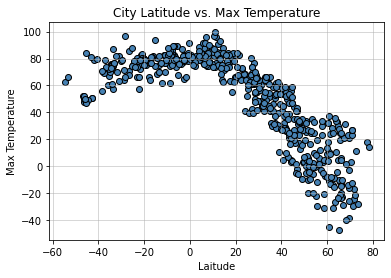

In [24]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
#plt.savefig("../Images/City Latitude vs Max Temperature.png")
plt.savefig("D:/UTSA/Github/python-api-challenge/WeatherPy/Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

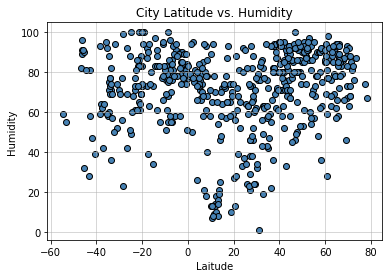

In [38]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
#plt.savefig("../Images/City Latitude vs Humidity.png")
plt.savefig("D:/UTSA/Github/python-api-challenge/WeatherPy/Images/City Latitude vs Humidity.png")


## Latitude vs. Cloudiness Plot

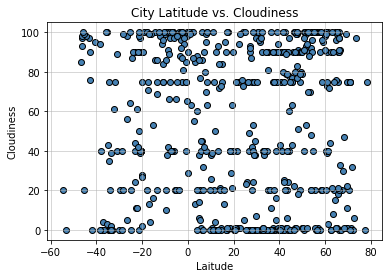

In [28]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
#plt.savefig("../Images/City Latitude vs Cloudiness.png")
plt.savefig("D:/UTSA/Github/python-api-challenge/WeatherPy/Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

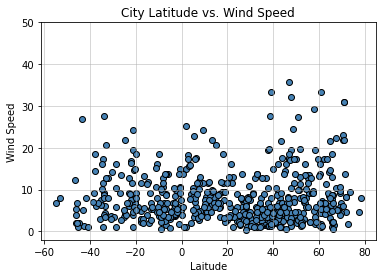

In [30]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
#plt.savefig("../Images/City Latitude vs Wind Speed.png")
plt.savefig("D:/UTSA/Github/python-api-challenge/WeatherPy/Images/City Latitude vs Wind Speed.png")

## Linear Regression

In [37]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]

# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    #plt.savefig("D:/UTSA/Github/python-api-challenge/WeatherPy/Images/City Latitude vs Humidity.png")
    plt.savefig("D:/UTSA/Github/python-api-challenge/WeatherPy/Images/City Latitude vs Humidity2.png")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.88


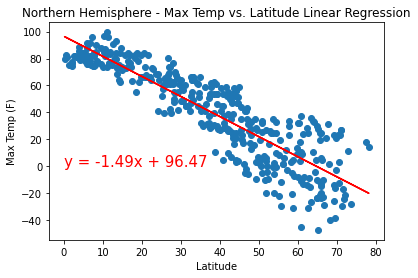

In [35]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.savefig("D:/UTSA/Github/python-api-challenge/WeatherPy/Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.54


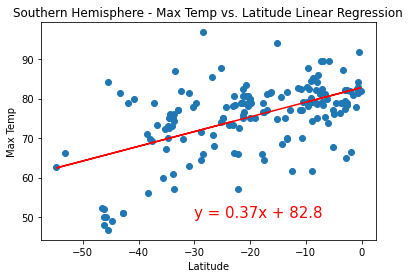

In [42]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp")

# Save the figure
#plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.savefig("D:/UTSA/Github/python-api-challenge/WeatherPy/Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.37


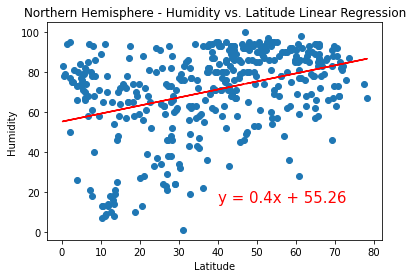

In [43]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")
plt.savefig("D:/UTSA/Github/python-api-challenge/WeatherPy/Images/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.25


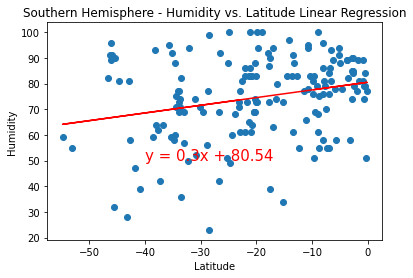

In [44]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity")

# Save the figure
#plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.savefig("D:/UTSA/Github/python-api-challenge/WeatherPy/Images/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.08


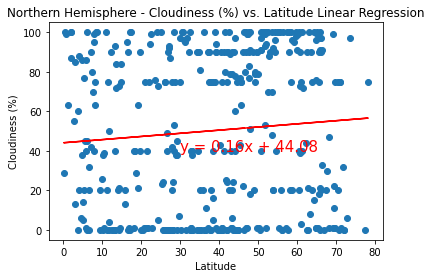

In [45]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.savefig("D:/UTSA/Github/python-api-challenge/WeatherPy/Images/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.35


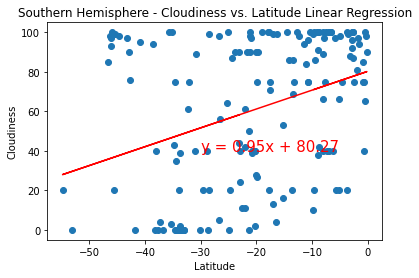

In [46]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness")

# Save the figure
#plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.savefig("D:/UTSA/Github/python-api-challenge/WeatherPy/Images/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.06


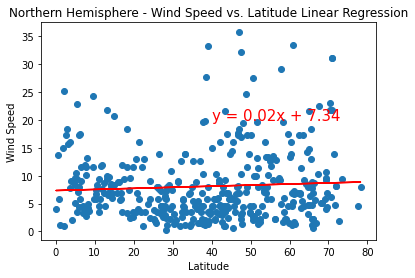

In [47]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
plt.savefig("D:/UTSA/Github/python-api-challenge/WeatherPy/Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.08


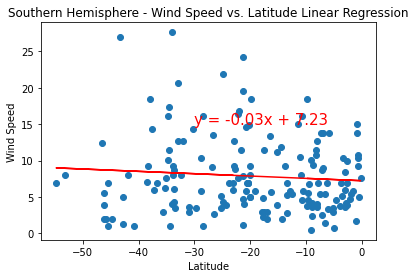

In [48]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed")

# Save the figure
#plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
plt.savefig("D:/UTSA/Github/python-api-challenge/WeatherPy/Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")